In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import numpy as np
import re
from numpy import linalg as LA
from time import time
from scipy import sparse
import matplotlib.pyplot as plt

22
12.96245722076795


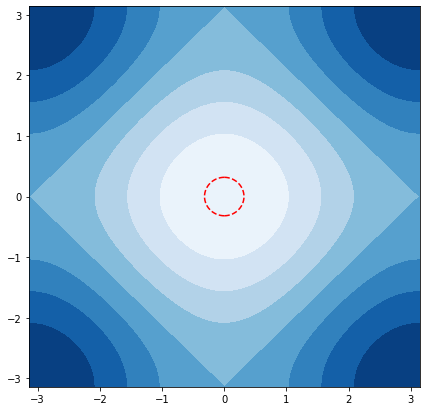

In [6]:
N=100
kx=np.linspace(0,np.pi,N)
ky=np.linspace(0,np.pi,N)
plt.rcParams['figure.figsize'] = [7,7]
Kx,Ky=np.meshgrid(kx,ky)
E=-2*(np.cos(Kx)+np.cos(Ky))
E_F=-3.9 
CS=plt.contour(kx,ky,E,levels=[E_F],colors='red')
plt.contour(-kx,ky,E,levels=[E_F],colors='red')
plt.contour(-kx,-ky,E,levels=[E_F],colors='red')
plt.contour(kx,-ky,E,levels=[E_F],colors='red')
plt.contourf(kx,ky,E,cmap='Blues')
plt.contourf(-kx,ky,E,cmap='Blues')
plt.contourf(-kx,-ky,E,cmap='Blues')
plt.contourf(kx,-ky,E,cmap='Blues')
F = CS.collections[0].get_paths()[0]
coordsF = F.vertices
vF = np.dstack([2*np.sin(coordsF[:,0]),2*np.sin(coordsF[:,1])])[0]
vFmag = vF[:,0]*vF[:,0]+vF[:,1]*vF[:,1]
shatF  = vF/np.transpose([vFmag])
thetaF0 =  np.float64(np.arctan((vF[:,1]+1e-2)/(vF[:,0]+1e-2)))
print (len(thetaF0))
coordsFx_irr = coordsF[:,0]
coordsFy_irr = coordsF[:,1]
Lambda0=np.pi/np.sqrt(2)
steps=30000 #30000
eps=(1-1/(N*N)) #0.9999
lambdaF=Lambda0*eps**np.linspace(0,steps-1,steps)
ThetaF,LambdaF=np.meshgrid(thetaF0,lambdaF)
Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))
EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)
r=np.sqrt(EFwvfAvg[0]+4)
print (2*np.pi*r)

### $E_{F}=-3.9, \Lambda_{0}=1.209*\frac{\pi}{\sqrt{2}}, J_{0}=1000$

In [4]:
1.209*np.pi/np.sqrt(2), 2*np.sqrt(2)

(2.685722736116732, 2.8284271247461903)

In [5]:
Temp=np.linspace(2.9e-2,5000,100000)
kB=1
factor=1.209#4/(np.pi)#4/(np.pi)#1.147 (for E_F=-3.99) #1.16 (for E_F=-3.95) #1.177 (for E_F=-3.9), 1.212(for E_F=-3.8)
Lambda0=factor*(np.pi/(np.sqrt(2)))
Chi=np.zeros(1000)
Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))
EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)
J=np.zeros(steps)
J_0=1000              #1000 (fixed-1)
J[0]=J_0/(N*N)
k=0
for j in range(len(lambdaF)-1):
    Ek=(EFwvfAvg[j]-E_F)
    if(Ek-J[0]/4>0):
        if(Ek-J[j]/4.>0):
            J[j+1]=J[j]+2*np.pi*r*J[j]*(1/((Ek)**2-J[j]**2/16))*J[j]*Ek
        else:
            Jfixed=4*Ek
            k=j
            J[j:]=4*Ek
            break
    else:
        if(Ek-J[j]/4<0):
            J[j+1]=J[j]+2*np.pi*r*J[j]*(1/((Ek)**2-J[j]**2/16))*J[j]*(Ek)
        else:
            Jfixed=4*Ek
            k=j
            J[j:]=4*Ek
            break
Jstar=Jfixed            
Chi=(1/(4*kB*Temp)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp)))/(1+np.cosh(Jstar/(2*kB*Temp)))

In [6]:
Tk=(EFwvfAvg[k]-E_F)*lambdaF[k]/Lambda0
4*Tk*Chi[0],Tk,2*Tk/Jstar,Jstar

(0.4132755210773381, 3.432769419296422, 0.4132755210773381, 16.612498172394936)

# 4*Chi*Tk vs T/Tk

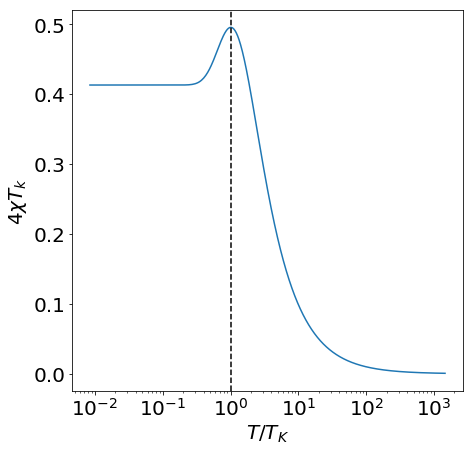

In [7]:
figure,ax=plt.subplots()
plt.rcParams['figure.figsize'] = [10,7]
ax.set_xscale('log')
ax.set_xlabel(r'$T/T_{K}$',fontsize=20)
ax.set_ylabel(r'$4\chi T_{k}$',fontsize=20)
ax.plot(Temp/Tk,4*Chi*Tk)
ax.axvline(x=1,color='k',linestyle='--')
ax.tick_params(labelsize=20)
plt.savefig('SusceptibilityVsTemp1.png')

## Chi*Temp vs Temp

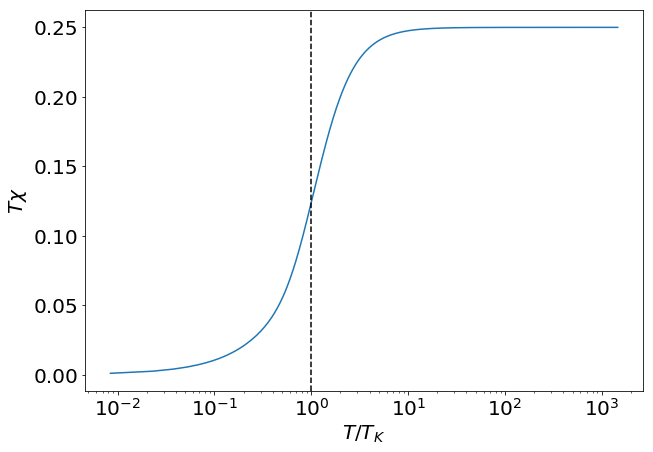

In [8]:
figure,ax=plt.subplots()
plt.rcParams['figure.figsize'] = [10,7]
ax.set_xscale('log')
ax.set_xlabel(r'$T/T_{K}$',fontsize=20)
ax.set_ylabel(r'$ T\chi$',fontsize=20)
ax.plot(Temp/Tk,Chi*Temp)
ax.axvline(x=1,color='k',linestyle='--')
ax.tick_params(labelsize=20)
plt.savefig('SusceptibilityVsTemp2.png')

# Saturation value of $\chi$ at T=0K (Wilson Number)

In [9]:
Temp=np.linspace(2.9e-2,5000,100000)#100**np.linspace(-0.8,1.7,1000)
J_0Arr=np.array([100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000])              
TforChiMax=np.zeros(len(J_0Arr))
ChiMax=np.zeros(len(J_0Arr))
WilsonNo=np.zeros(len(J_0Arr))
JfixedArr=np.zeros(len(J_0Arr))
TkondoArr=np.zeros(len(J_0Arr))
for i in range(len(J_0Arr)): 
    J=np.zeros(steps)
    J[0]=J_0Arr[i]/(N*N)
    k=0
    for j in range(len(lambdaF)-1):
        Ek=(EFwvfAvg[j]-E_F)
        if(Ek-J[0]/4>0):
            if(Ek-J[j]/4.>0):
                J[j+1]=J[j]+2*np.pi*r*J[j]*(1/((Ek)**2-J[j]**2/16))*J[j]*Ek
            else:
                Jfixed=4*Ek
                k=j
                J[j:]=4*Ek
                break
        else:
            if(Ek-J[j]/4<0):
                J[j+1]=J[j]+2*np.pi*r*J[j]*(1/((Ek)**2-J[j]**2/16))*J[j]*(Ek)
            else:
                Jfixed=4*Ek
                k=j
                J[j:]=4*Ek
                break
    JfixedArr[i]=Jfixed
    TkondoArr[i]=(EFwvfAvg[k]-E_F)*lambdaF[k]/Lambda0
    Chi1=(1/(4*kB*Temp)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp)))/(1+np.cosh(Jstar/(2*kB*Temp)))
    ChiMax[i]=np.max(Chi1)
    TforChiMax[i]=Temp[np.where(Chi1==np.max(Chi))[0][0]]

In [10]:
ChiMax*Tk

array([0.12394812, 0.12394812, 0.12394812, 0.12394812, 0.12394812,
       0.12394812, 0.12394812, 0.12394812, 0.12394812, 0.12394812,
       0.12394812, 0.12394812, 0.12394812])

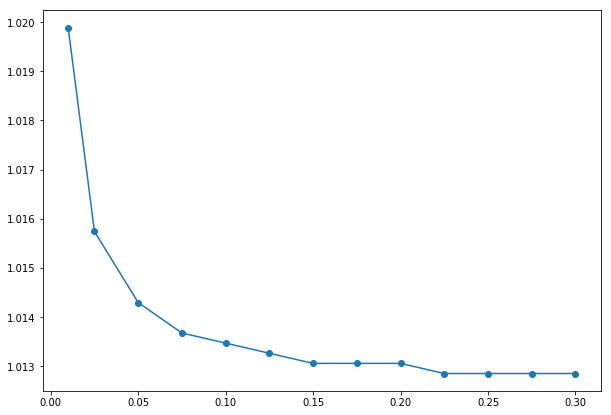

In [11]:
plt.plot(J_0Arr/(N*N),TforChiMax/TkondoArr,marker='o')

In [12]:
JfixedArr

array([16.55922986, 16.59360018, 16.60562665, 16.61078034, 16.61249817,
       16.61421597, 16.61593372, 16.61593372, 16.61593372, 16.61765145,
       16.61765145, 16.61765145, 16.61765145])

In [13]:
TkondoArr

array([3.41117061, 3.42509451, 3.42997717, 3.43207121, 3.43276942,
       3.43346773, 3.43416613, 3.43416613, 3.43416613, 3.43486464,
       3.43486464, 3.43486464, 3.43486464])

In [14]:
WilsonNo=2*TkondoArr/JfixedArr 

In [15]:
WilsonNo

array([0.41199629, 0.41282115, 0.41311024, 0.41323419, 0.41327552,
       0.41331685, 0.41335819, 0.41335819, 0.41335819, 0.41339953,
       0.41339953, 0.41339953, 0.41339953])

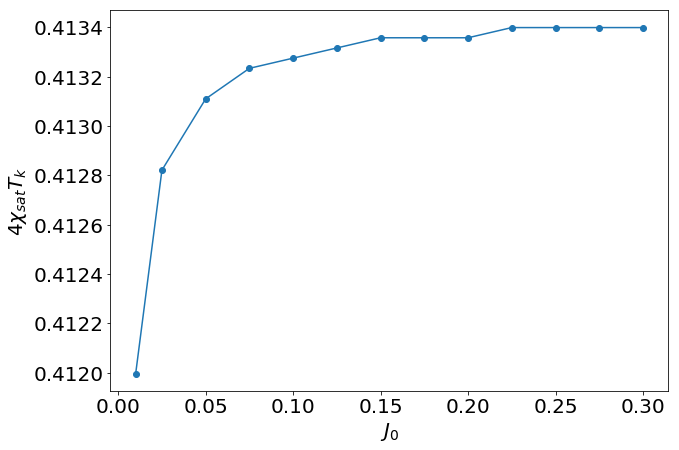

In [16]:
figure,ax=plt.subplots()
ax.set_xlabel(r'$J_{0}$',fontsize=20)
ax.set_ylabel(r'$4\chi_{sat}T_{k}$',fontsize=20)
ax.plot(J_0Arr/(N*N),WilsonNo,marker='o')
ax.tick_params(labelsize=20)

plt.savefig('WilsonNumber.png')

# Peak value of $\chi$ at T=0K 

In [17]:
ChiMax

array([0.03610733, 0.03610733, 0.03610733, 0.03610733, 0.03610733,
       0.03610733, 0.03610733, 0.03610733, 0.03610733, 0.03610733,
       0.03610733, 0.03610733, 0.03610733])

## $Regime-1: J_{0}= 5\times 10^{-3}t$ to $7\times 10^{-3}t$

In [24]:
J0arr=4.9e-3*(1.1)**np.linspace(50,160,300)
LambdaFParr=0.0*J0arr
JfixedArr=0.0*J0arr
omega=0.0
for J_0 in J0arr:
    J=np.zeros(steps)
    J[0]=J_0/(N*N)
    k=0
    for i in range(len(lambdaF)-1):
        Ek=EFwvfAvg[i]-E_F
        if(Ek-J[0]/4>0):
            if(Ek-J[i]/4.>0):
                J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break
        else:
            if(Ek-J[i]/4<0):

                J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break              
    LambdaFParr[J0arr==J_0]=lambdaF[k]/Lambda0            

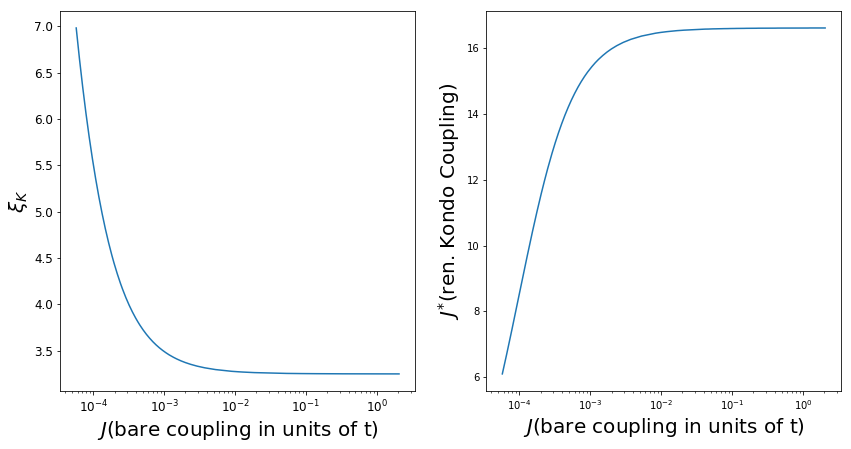

In [25]:
figure,ax=plt.subplots(1,2)
ax[0].set_xscale('log')
plt.rcParams['figure.figsize'] = [14,7]
ax[0].plot(J0arr/(N*N),1/(LambdaFParr/Lambda0),label='URG')

ax[0].tick_params(labelsize='large')
ax[0].set_xlabel(r'$J$(bare coupling in units of t)',fontsize=20)
ax[0].set_ylabel(r'$\xi_{K}~$',fontsize=20)
ax[1].set_xscale('log')
#ax[1].set_yscale('log')
ax[1].plot(J0arr/(N*N),JfixedArr,label='URG')
#ax[1].plot(J0arr[0:820],JfixedArr[0:820]*N*N,label='URG')
#plt.rcParams['figure.figsize'] = [14,7]
ax[1].set_xlabel(r'$J$(bare coupling in units of t)',fontsize=20)
ax[1].set_ylabel(r'$J^{*}$(ren. Kondo Coupling)',fontsize=20)
#ax.set_yticks(np.arange(1,7, 1.0))
plt.savefig('KondoComplete.png')

In [20]:
4.9e-3*(1.1)**np.linspace(50,170,300)[0],4.9e-3*(1.1)**np.linspace(50,170,300)[-1]

(0.5752151791105093, 53327.66362521717)

In [21]:
from tqdm import tqdm
#URG
factor=10**np.linspace(0,6,7)
J0arr=4.9e-3*(1.1)**np.linspace(50,170,300)#np.concatenate([np.concatenate([np.linspace(5e-3,1,100),np.linspace(1.1,0.9e8,1000)]),np.linspace(1e8,1.15e9,10000)])
LambdaFParr=np.zeros([7,len(J0arr)])
JfixedArr=np.zeros([7,len(J0arr)])
omega=0.0
Jmax=np.zeros(7)
for f in range(7):
    for J_0 in tqdm(J0arr):
        #print(np.where(J0arr==J_0))
        J=np.zeros(steps)
        J[0]=J_0/(N*N)
        k=0
        for i in range(len(lambdaF)-1):
            Ek=(EFwvfAvg[i]-E_F)*factor[f]
            if(Ek-J[0]/4>0):
                if(Ek-J[i]/4.>0):
                    J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
                else:
                    JfixedArr[f][J0arr==J_0]=4*Ek
                    k=i
                    J[i:]=4*Ek
                    break
            else:
                if(Ek-J[i]/4<0):

                    J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
                else:
                    JfixedArr[f][J0arr==J_0]=4*Ek
                    k=i
                    J[i:]=4*Ek
                    break       

        LambdaFParr[f][J0arr==J_0]=lambdaF[k]/Lambda0        

100%|██████████| 300/300 [00:39<00:00,  7.51it/s]


In [74]:
JfixedMax=np.asarray([JfixedArr[f].max() for f in range(len(factor))])

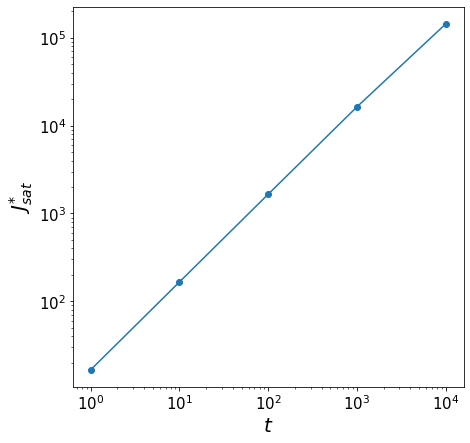

In [79]:
figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] = [7,7]
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(labelsize=15)
ax.plot(factor[:-2],JfixedMax[:-2],marker='o')
ax.set_xlabel(r'$t$',fontsize=20)
ax.set_ylabel(r'$J_{sat}^{*}$',fontsize=20)
plt.savefig('KondoCouplingVst.png')

$Z(B)=2\exp(\beta\frac{J}{4})\left[\cosh(\beta\frac{B}{2})+\cosh(\frac{\beta}{2}(\sqrt{B^{2}+J^{2}}))\right]$<br>
$C=\frac{d}{dT}\left(\frac{k_{B}T^{2}}{Z}\frac{dZ}{dT}\right)=\frac{1}{k_{B}T^{2}}\frac{d}{d\beta}\left(\frac{1}{Z}\frac{dZ}{d\beta}\right)=-\frac{1}{k_{B}T^{2}Z^{2}}\left(\frac{dZ}{d\beta}\right)^{2}+\frac{1}{k_{B}T^{2}Z}\frac{d^{2}Z}{d\beta^{2}}$<br>
$\frac{dZ}{d\beta}=\frac{J}{2}\exp(\beta\frac{J}{4})\left[\cosh(\beta\frac{B}{2})+\cosh(\frac{\beta}{2}(\sqrt{B^{2}+J^{2}}))\right]+2\exp(\beta\frac{J}{4})\left[\frac{B}{2}\sinh(\beta\frac{B}{2})+\frac{\sqrt{B^{2}+J^{2}}}{2}\sinh(\frac{\beta}{2}(\sqrt{B^{2}+J^{2}}))\right]$<br>
$\lim_{B\to 0}\frac{dZ}{d\beta}=\frac{J}{2}\exp(\beta\frac{J}{4})\left[1+\cosh(\frac{\beta}{2}J)\right]+J\exp(\beta\frac{J}{4})\sinh(\frac{\beta J}{2})$<br>
$\frac{d^{2}Z}{d\beta^{2}}=\frac{J^{2}}{8}\exp(\beta\frac{J}{4})\left[\cosh(\beta\frac{B}{2})+\cosh(\frac{\beta}{2}(\sqrt{B^{2}+J^{2}}))\right]+\frac{J}{2}\exp(\beta\frac{J}{4})\left[\frac{B}{2}\sinh(\beta\frac{B}{2})+\sqrt{B^{2}+J^{2}}\sinh(\frac{\beta}{2}(\sqrt{B^{2}+J^{2}}))\right]+\frac{J}{2}\exp(\beta\frac{J}{4})\left[\frac{B}{2}\sinh(\beta\frac{B}{2})+\frac{\sqrt{B^{2}+J^{2}}}{2}\sinh(\frac{\beta}{2}(\sqrt{B^{2}+J^{2}}))\right]+2\exp(\beta\frac{J}{4})\left[\frac{B^{2}}{4}\cosh(\beta\frac{B}{2})+\frac{B^{2}+J^{2}}{4}\cosh(\frac{\beta}{2}(\sqrt{B^{2}+J^{2}}))\right]$<br>
$\lim_{B\to 0}\frac{d^{2}Z}{d\beta^{2}}=\frac{J^{2}}{8}\exp(\beta\frac{J}{4})\left[1+\cosh(\frac{\beta}{2}J)\right]+\frac{3J^{2}}{4}\exp(\beta\frac{J}{4})\sinh(\frac{\beta J}{2})+\frac{J^{2}}{4}\exp(\beta\frac{J}{4})\sinh(\frac{\beta J}{2})+2\exp(\beta\frac{J}{4})\frac{J^{2}}{4}\cosh(\frac{\beta  J}{2})$

In [87]:
B=0.01
Temp=np.linspace(7e-2,100,1000)
Z=2*np.exp(Jstar/(4*Temp))*(np.cosh(B/(2*Temp))+np.cosh(np.sqrt(B**2+Jstar**2)/(2*Temp)))
dZ_dbeta1=(Jstar/2)*np.exp(Jstar/(4*Temp))*(np.cosh(B/(2*Temp))+np.cosh(np.sqrt(B**2+Jstar**2)/(2*Temp)))
dZ_dbeta2=2*np.exp(Jstar/(4*Temp))*((B/2)*np.sinh(B/(2*Temp))+(np.sqrt(B**2+Jstar**2)/2)*np.sinh(np.sqrt(B**2+Jstar**2)/(2*Temp)))

In [88]:
dZ_dbeta=dZ_dbeta1+dZ_dbeta2

In [89]:
d2Z_dbeta2_1=(Jstar**2/8)*np.exp(Jstar/(4*Temp))*(np.cosh(B/(2*Temp))+np.cosh(np.sqrt(B**2+Jstar**2)/Temp))
d2Z_dbeta2_2=(Jstar/2)*np.exp(Jstar/(4*Temp))*((B/2)*np.sinh(B/(2*Temp))+np.sqrt(B**2+Jstar**2)*np.sinh(np.sqrt(B**2+Jstar**2)/(2*Temp)))
d2Z_dbeta2_3=(Jstar/2)*np.exp(Jstar/(4*Temp))*((B/2)*np.sinh(B/(2*Temp))+(np.sqrt(B**2+Jstar**2)/2.)*np.sinh(np.sqrt(B**2+Jstar**2)/(2*Temp)))
d2Z_dbeta2_4=2*np.exp(Jstar/(4*Temp))*((B**2/4)*np.cosh(B/(2*Temp))+((B**2+Jstar**2)/4.)*np.cosh(np.sqrt(B**2+Jstar**2)/(2*Temp)))

In [90]:
d2Z_dbeta2=d2Z_dbeta2_1+d2Z_dbeta2_2+d2Z_dbeta2_3+d2Z_dbeta2_4

In [91]:
C=-(1/(Temp**2*Z**2))*(dZ_dbeta)**2+(1/(Temp**2*Z))*d2Z_dbeta2

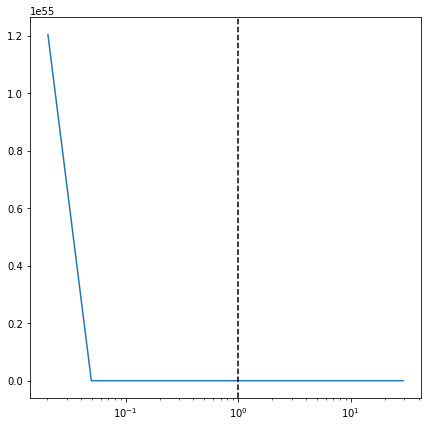

In [94]:
figure,ax=plt.subplots(1)
ax.set_xscale('log')
ax.plot(Temp/Tk,C)
ax.axvline(x=1,color='k',linestyle='--')

In [28]:
Temp=np.linspace(1e-1,1000,100000)
boltz1=np.exp(3*Jstar/(4*kB*Temp))
boltz2=np.exp(-Jstar/(4*kB*Temp))
scale=Jstar**2/(16*kB*Temp**2)

$Z=2\exp(\beta\frac{J}{4})\left[1+\cosh(\frac{\beta}{2}J)\right]=\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})$<br>
$\frac{dZ}{dT}=-\frac{3J}{4k_{B}T^{2}}\exp(\frac{3J}{4 k_{B}T})+\frac{3J}{4k_{B}T^{2}}\exp(-\frac{J}{4 k_{B}T})$<br>
$\frac{d^{2}Z}{dT^{2}}=\frac{6J}{4k_{B}T^{3}}\exp(\frac{3J}{4 k_{B}T})+\frac{9J^{2}}{16k^{2}_{B}T^{4}}\exp(\frac{3J}{4 k_{B}T})-\frac{6J}{4k_{B}T^{3}}\exp(-\frac{J}{4 k_{B}T})+\frac{3J^{2}}{16k^{2}_{B}T^{4}}\exp(-\frac{J}{4 k_{B}T})$<br>

$\frac{k_{B}T^{2}}{Z}\frac{d^{2}Z}{dT^{2}}=\frac{3J}{2T}\frac{\exp(\frac{3J}{4 k_{B}T})-\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}+\frac{J^{2}}{16k_{B}T^{2}}\frac{9\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}$<br>

$\frac{2k_{B}T}{Z}\frac{dZ}{dT}=-\frac{3J}{2T}\frac{\exp(\frac{3J}{4 k_{B}T})-\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}$<br>

$-\frac{k_{B}T^{2}}{Z^{2}}\left(\frac{dZ}{dT}\right)^{2}=-\frac{9J^{2}}{16k_{B}T^{2}}\frac{(\exp(-\frac{J}{4 k_{B}T})-\exp(\frac{3J}{4 k_{B}T}))^{2}}{(\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T}))^{2}}$

$C=\frac{d}{dT}(k_{B}T^{2}\frac{1}{Z}\frac{dZ}{dT})=-\frac{k_{B}T^{2}}{Z^{2}}\left(\frac{dZ}{dT}\right)^{2}+\frac{2k_{B}T}{Z}\frac{dZ}{dT}+\frac{k_{B}T^{2}}{Z}\frac{d^{2}Z}{dT^{2}}$<br>

$C=\frac{J^{2}}{16k_{B}T^{2}}\frac{9\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}-\frac{9J^{2}}{16k_{B}T^{2}}\frac{(\exp(-\frac{J}{4 k_{B}T})-\exp(\frac{3J}{4 k_{B}T}))^{2}}{(\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T}))^{2}}$

In [29]:
C=scale*(9*boltz1+3*boltz2)/(boltz1+boltz2)-9*scale*(boltz1-boltz2)**2/(boltz1+boltz2)**2

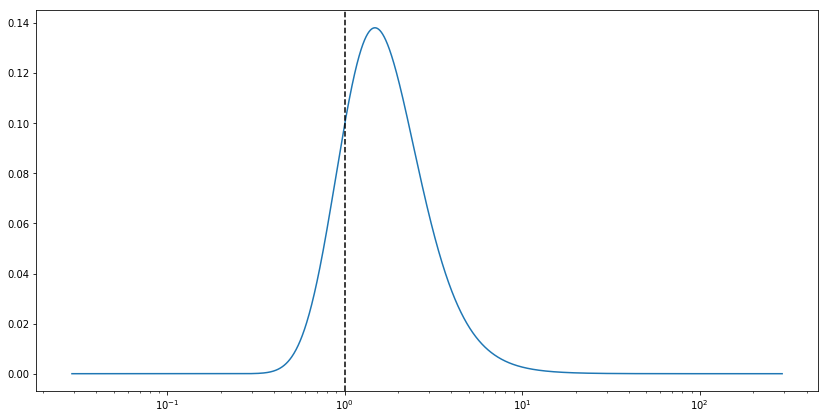

In [33]:
figure,ax=plt.subplots(1)
ax.set_xscale('log')
ax.plot(Temp/Tk,C/Temp)
ax.axvline(x=1,color='k',linestyle='--')